In [33]:
%pylab inline

from sklearn import datasets, linear_model, model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd


Populating the interactive namespace from numpy and matplotlib


##### датасет для задачи регрессии Boston Housing, 

##### необходимо предсказать стоимость дома по 13 признакам.

In [3]:
data = datasets.load_boston()
df = pd.DataFrame(data.data)
df.columns = data.feature_names
y = data.target

In [7]:
print(data.DESCR[:1500])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

____________

##### 1. Исследовать данные. (1 балл)

нарисовать 13 картинок, которые покажут зависимость целевой переменной (таргета, игрека, y) от каждого из признаков.

Hint. используйте https://matplotlib.org/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py

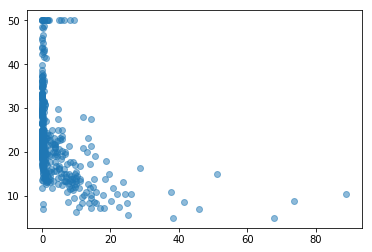

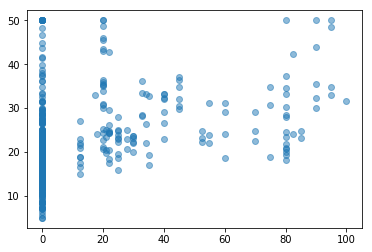

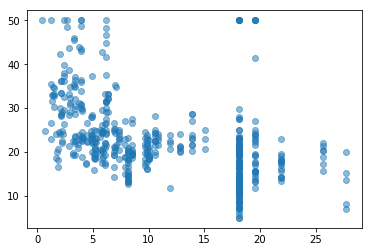

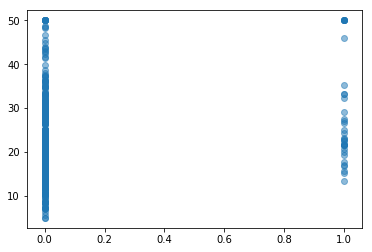

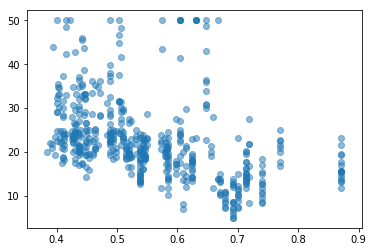

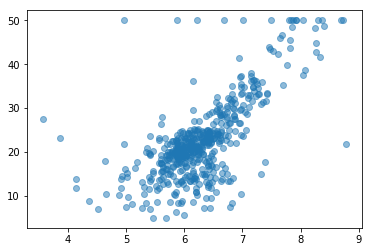

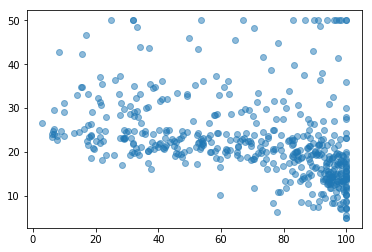

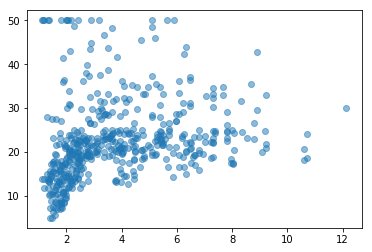

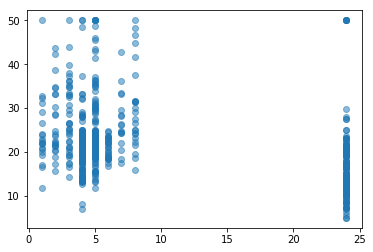

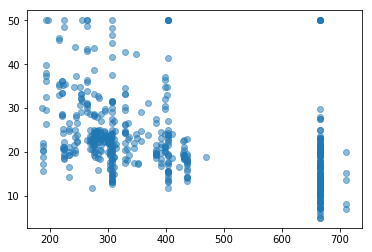

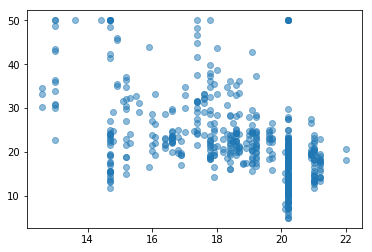

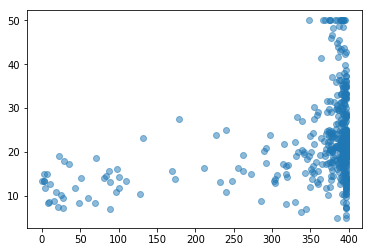

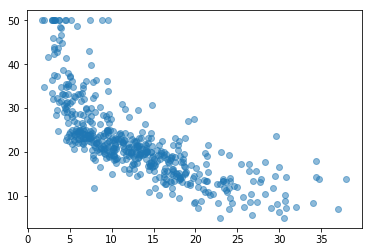

In [15]:
plt.scatter(df.CRIM, y, alpha=0.5)
plt.show()
plt.scatter(df.ZN, y, alpha=0.5)
plt.show()
plt.scatter(df.INDUS, y, alpha=0.5)
plt.show()
plt.scatter(df.CHAS, y, alpha=0.5)
plt.show()
plt.scatter(df.NOX, y, alpha=0.5)
plt.show()
plt.scatter(df.RM, y, alpha=0.5)
plt.show()
plt.scatter(df.AGE, y, alpha=0.5)
plt.show()
plt.scatter(df.DIS, y, alpha=0.5)
plt.show()
plt.scatter(df.RAD, y, alpha=0.5)
plt.show()
plt.scatter(df.TAX, y, alpha=0.5)
plt.show()
plt.scatter(df.PTRATIO, y, alpha=0.5)
plt.show()
plt.scatter(df.B, y, alpha=0.5)
plt.show()
plt.scatter(df.LSTAT, y, alpha=0.5)
plt.show()

##### 2. Обучить регрессию. (1 балл)

Обучите любую линейную регрессию из sklearn. Померить качество на тестовой части по метрикам RMSE, R2.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.values, y, test_size=0.2, random_state=42)
# не меняйте рандом стейт! - он поможет сделать вычисления воспроизводимыми

In [10]:
regressor = LinearRegression(fit_intercept=True)

In [11]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
y_pred = regressor.predict(X_test)

In [13]:
np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred)

(4.928602182665331, 0.6687594935356327)

##### 3. Сделайте крутую фичу. (1 балл)

Вернитесь к скатерплотам. Если вы правильно все построили - то вы увидите что один из признаков (LSTAT) как то зависит от y. Сделайте спрямляющее преобразование (добавьте новый признак) и обучите регрессию и померийте снова качество по метрикам RMSE, R2. если все сделали правильно, то кажется что оно должно вырасти

In [20]:
df1 = df
df1['log'] = np.log(df.LSTAT)

In [22]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,log
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1.605430
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,2.212660
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1.393766
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,1.078410
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1.673351


In [48]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df1.values, y, test_size=0.2, random_state=42)
# не меняйте рандом стейт! - он поможет сделать вычисления воспроизводимыми
regressor1 = LinearRegression(fit_intercept=True)
regressor1.fit(X_train1, y_train1)
y_pred1 = regressor1.predict(X_test1)
np.sqrt(mean_squared_error(y_test1, y_pred1)), r2_score(y_test1, y_pred1)

(4.222829592602797, 0.7568339038342424)

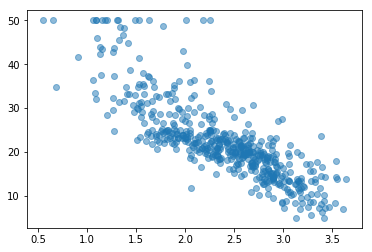

In [25]:
plt.scatter(df.log, y, alpha=0.5)
plt.show()

> добейтесь качества по R2

- 0.751


##### 4. задание про кросс-валидацию 

выберите оптимальный параметр регуляризации на ridge с помощью кросс-валидации на трейне. померийте качество на тесте. Увеличелось ли оно на метриках?

In [34]:
ridge = linear_model.Ridge()
alphas = np.logspace(-4, -.5, 30)

scores = list()
scores_std = list()

for alpha in alphas:
    ridge.alpha = alpha
    this_scores = model_selection.cross_val_score(
        ridge, X_train1, y_train1, n_jobs=1, cv=5,
        scoring=make_scorer(r2_score, greater_is_better=True)
    )
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

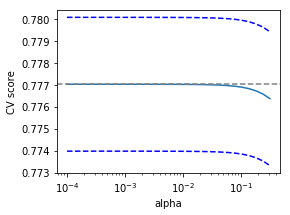

In [37]:
plt.figure(figsize=(4, 3))
plt.semilogx(alphas, scores)
# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas, np.array(scores) + np.array(scores_std) / np.sqrt(len(X_train1)),
             'b--')
plt.semilogx(alphas, np.array(scores) - np.array(scores_std) / np.sqrt(len(X_train1)),
             'b--')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')

plt.show()

In [39]:
scores[np.argmax(scores)], '+/-', scores_std[np.argmax(scores)], 'alpha=', alphas[np.argmax(scores)]

(0.7770223445472982, '+/-', 0.06120693551613373, 'alpha=', 0.0001)

In [42]:
ridge = linear_model.Ridge()
ridge.alpha = alpha
ridge.fit(X_train1, y_train1)
y_pred2 = ridge.predict(X_test1)
np.sqrt(mean_squared_error(y_test1, y_pred2)), r2_score(y_test1, y_pred2)

(4.236866063556971, 0.7552146736889868)

##### 5. задание про пайплайн

Используйте Pipeline из пакета sklearn.
сделайте поиск по параметрам (GridSearch), автоматически выберете какой способ нормировки признаков (минмакс скейлинг, стандарт скейлер) работает лучше, добавьте полиномиальных признаков, автоматически выберите модель (ридж лассо или просто регрессия) и регуляризацию к ней (если нужно).

In [47]:
pipeline = Pipeline([ ('first', MinMaxScaler()), 
('second', PolynomialFeatures()), 
('third', LinearRegression())]) 

parameters = [{ 'first':[StandardScaler(),MinMaxScaler()], 
'third':[Lasso(),Ridge(),LinearRegression()]}] 

g_s = GridSearchCV(pipeline, param_grid = parameters) 
g_s.fit(X_train1,y_train1) 
g_s.best_params_ 
y_pred_5 = g_s.predict(X_test1) 
np.sqrt(mean_squared_error(y_test1, y_pred_5)), r2_score(y_test1, y_pred_5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(3.5038919485668005, 0.8325838616509038)

> добейтесь качества по R2

- 0.811
